# Uppgift 02

Det är fritt fram att använda externa bibliotek i uppgiften.
Vänligen lämna in uppgiften som en Python notebook ```02_[förnamn]_[efternamn].ipynb```, ersätt med egna namn; Använda ```02_[person01]_[person02].ipynb```, ifall ni lämnar in som par.


## Part 1

- Bygg ett beslutsträd för HR som stödjer applikations filtrering.
- Använda historiska data som finns i ```hr_train_1.csv```
- Beslutsträdet skall sätta flaggan ```‘ignore’:True``` på sökande som inte är intressanta för HR avdelning.
    - Ni kan börja utifrån koden nedan, eller från koden i ```Data Science from Scratch``` som finns tillgänglig på: [Google Colab](https://colab.research.google.com/drive/1aNHPiVqt9FGmDSeeeQnr7vImMHYzyWBK?usp=sharing) alternativt [Github](https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/decision_trees.py)

- Testa ert beslutsträd på följande fyra personer och presentera resultaten.

| Experience | Programming | Tweets | PhD |
|:-----:|:-----:|:---:|:---:|
| Senior | Java | with tweets  | no PhD  |
| Senior | Python | no tweets | with PhD |
| Mid | Java | with tweets | no PhD |
| Junior | Python | with tweets | no PhD |


## Part 2
**Utforska** reglerna för beslutsträdet ni skapat.

Motivera era insikter för HR avdelningen.

*Ni kan till exempel hitta följande:*
- Hur många resultat finns det totalt med den data som nu finns?
- Vilken är den *kortaste* vägen för beslutsträdet att acceptera/avböja en sökande
- Finns det trender eller fördelar som en sökande kan ha i ert beslutsträd?
    - *Tips: Använd datautforskning (EDA) och hitta sedan insikter!*


## Part 3
*Föreställ er nu att HR avdelningen börjat samla mer data i form av sökandes kön. Lägg till kolumnen ```gender``` i er data och fyll det med slumpmässiga värden (0, 1, 2). Hur kan du tillverka ett test som demonstrerar att ditt beslutsträd är partiskt och att ca 2/3 av alla med kön ```2``` kommer bli flaggade för ```‘ignore’:True```. Visa denna partiskhet för HR avdelningen och förklara för eller emot den*

- Lägg till kolumnen ```gender``` i er data och fyll den med slumpmässiga värden
- Bevisa att två tredjedelar av kön(*gender*) ```2``` kommer bli flaggade med ```‘ignore’:True``` i ditt test.
- Kan du förklara eller motförklara detta med hjälp av data utforskning och motivera ditt svar mot HR avdelningen
    - *Tips: Prova dela upp din data i test/train (20%/80%)*

In [1]:
# imports
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# # Modiferat exempel från w3
# # https://www.w3schools.com/python/python_ml_decision_tree.asp

# eggs = [
#  {"Age": 36,"Experience": 10,"Rank": 9,"Nationality": "UK","Go": "NO"},
#  {"Age": 42,"Experience": 12,"Rank": 4,"Nationality": "USA","Go": "NO"},
#  {"Age": 23,"Experience": 4,"Rank": 6,"Nationality": "N","Go": "NO"},
#  {"Age": 52,"Experience": 4,"Rank": 4,"Nationality": "USA","Go": "NO"}
# ]

# ham = pandas.DataFrame.from_dict(eggs)

# spam = {'UK': 0, 'USA': 1, 'N': 2}
# ham['Nationality'] = ham['Nationality'].map(spam)
# spam = {'YES': 1, 'NO': 0}
# ham['Go'] = ham['Go'].map(spam)

# features = ['Age', 'Experience', 'Rank', 'Nationality']

# X = ham[features]
# y = ham['Go']

# dtree = DecisionTreeClassifier()
# dtree = dtree.fit(X, y)

# tree.plot_tree(dtree, feature_names=features) 

In [3]:
# Din kod här:
## Du kan referea till koden ovan, eller ta bort den
## Tips: Börja med att läsa in rätt data från .csv filen

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import sys
import matplotlib
matplotlib.use('Agg')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
df = pandas.read_csv("./hr_train_1.csv")
df.head(1)

,level,lang,tweets,phd,ignore
0,Senior,Java,no,no,True


In [6]:
d = {'Senior': 3, 'Mid': 2, 'Junior': 2}
df['level'] = df['level'].map(d)

d = {'Java': 1, 'Python': 2, 'R': 3}
df['lang'] = df['lang'].map(d)

d = {'no': 0, 'yes': 1}
df['tweets'] = df['tweets'].map(d)

d = {'True': 1, 'False': 0}
df['ignore'] = df['ignore'].map(d)

d = {'no': 0, 'yes': 1}
df['phd'] = df['phd'].map(d)

print(df.head(1))

   level  lang  tweets  phd  ignore
0      3     1       0    0     NaN


In [7]:
features = ['level', 'lang', 'tweets', 'phd']
X = df[features]
y = df['phd']

In [8]:
# Create and fit the DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
# Plot and save the tree
tree.plot_tree(dtree, feature_names=features)
plt.savefig('tree.png')

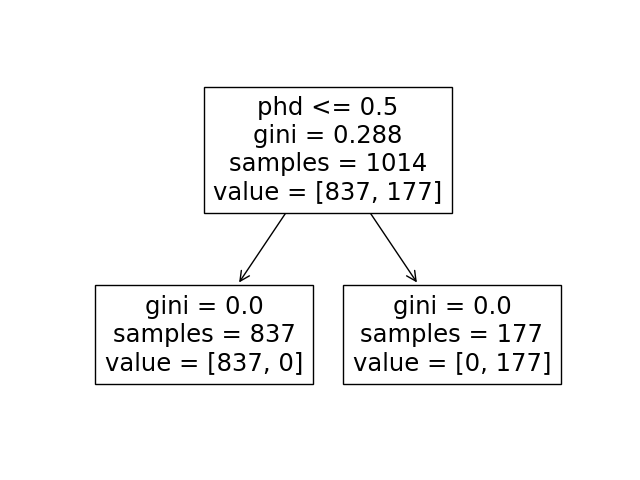

In [9]:
from IPython.display import Image, display
image_path = './tree.png'
display(Image(filename=image_path))